<a href="https://colab.research.google.com/github/MDI74/Test/blob/master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import os
from PIL import Image, ImageFont
from IPython.display import display
from pathlib import Path
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!zip -r yolov5.zip /content/yolov5/Yolov5_DeepSort_Pytorch

In [ ]:
#!unzip -q /content/drive/MyDrive/train_data.zip -d ../
!unzip -q /content/drive/MyDrive/Yolov5_DeepSort_Pytorch.zip -d /content

In [ ]:
%cd /content/Yolov5_DeepSort_Pytorch/yolov5
import detect

/content/Yolov5_DeepSort_Pytorch/yolov5


In [ ]:
%pip install -qr /content/Yolov5_DeepSort_Pytorch/requirements.txt

     |████████████████████████████████| 596 kB 5.1 MB/s 
     |████████████████████████████████| 5.8 MB 56.0 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 190 kB 73.0 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 42 kB 965 kB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 73 kB 2.0 MB/s 
     |████████████████████████████████| 68 kB 7.4 MB/s 
     |████████████████████████████████| 41 kB 668 kB/s 


In [ ]:
def out_images(source):
  exp_list = []
  if source.endswith(('.png', '.jpg', '.jpeg')):
    source = source.split('/')[-1]
    p = Path("/content/drive/MyDrive/Results/detect")
    for x in p.rglob("exp*"):
        if str(x) == "/content/drive/MyDrive/Results/detect/exp":
          x = "/content/drive/MyDrive/Results/detect/exp0"
        exp_list.append(int((str(x).split('exp')[-1])))
    if len(exp_list) == 1:
        image_path = f'/content/drive/MyDrive/Results/detect/exp/{source}'
    else:
      exp_list.sort()
      number = str(exp_list[-1])
      image_path = f'/content/drive/MyDrive/Results/detect/exp{number}/{source}'
    img = Image.open(image_path)
    display(img)

In [ ]:
def classification(choice):
    if choice == '1':
      %cd /content/Yolov5_DeepSort_Pytorch/yolov5
      source = input('Укажите путь до источника входных данных -> ')
      detect.run(weights='/content/drive/MyDrive/30x.pt', conf_thres=0.25, imgsz=(1280, 1280), source = source, project='/content/drive/MyDrive/Results/detect', name='exp')
      out_images(source)
    elif choice == '2':
      %cd /content/Yolov5_DeepSort_Pytorch
      !python track.py --yolo_model /content/drive/MyDrive/30x.pt --conf-thres 0.25 --img 1280 --save-vid --project /content/drive/MyDrive/Results/track

Выберите способ работы:
1.Детектирование
2.Отслеживание
-> 1
/content/Yolov5_DeepSort_Pytorch/yolov5
Укажите путь до источника входных данных -> /content/drive/MyDrive/image/2.jpg


YOLOv5 🚀 2022-5-13 torch 1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 444 layers, 86173414 parameters, 0 gradients


image 1/1 /content/drive/MyDrive/image/2.jpg: 704x1280 10 persons, Done. (0.104s)
Speed: 1.0ms pre-process, 103.6ms inference, 1.4ms NMS per image at shape (1, 3, 1280, 1280)
Results saved to /content/drive/MyDrive/Results/detect/exp18


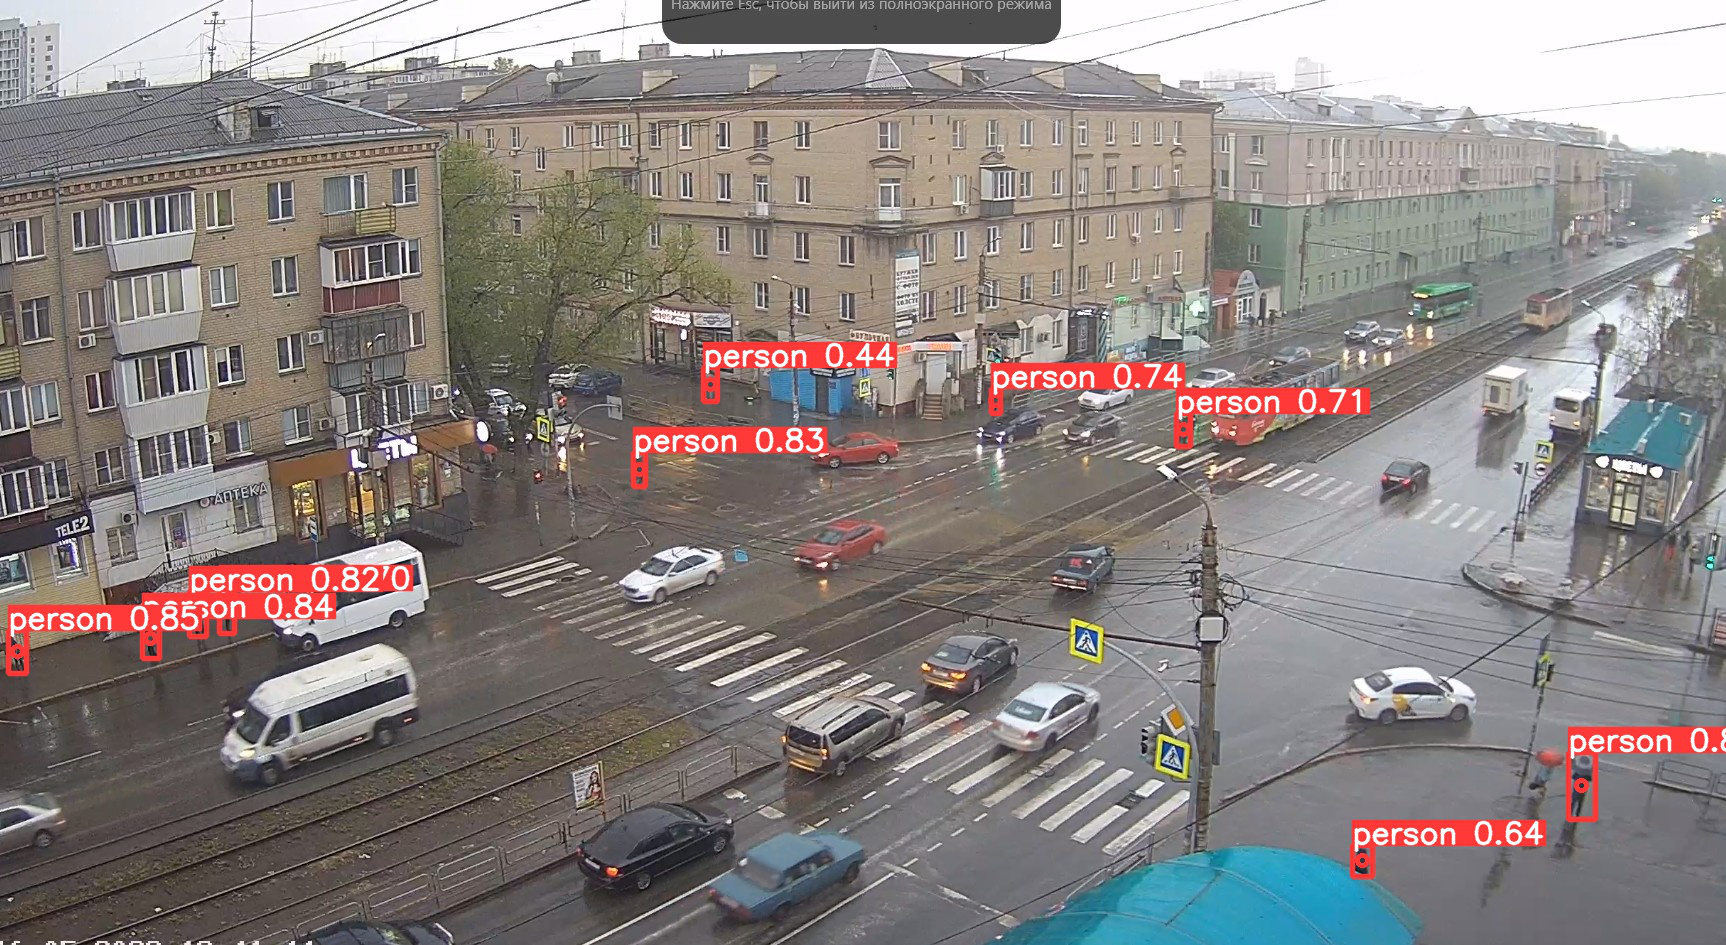

In [ ]:
print('Выберите способ работы:', '1.Детектирование', '2.Отслеживание', sep='\n')
classification(input('-> '))